In [83]:
#필요한 함수들 호출
import urllib.request
import time
import pandas as pd
pd.set_option('display.max_columns', None)
import json

In [84]:
#필요한 변수들
api_key = '9e634d84-d6e6-46a8-b998-eb90686ce6e1'
id ='1459'
url = f'http://www.kamis.or.kr/service/price/xml.do?action=monthlySalesList&p_yyyy=2020&p_period=40&p_itemcategorycode=100&p_itemcode=111&p_kindcode=01&p_graderank=2&p_countycode=1101&p_convert_kg_yn=N&p_cert_key={api_key}&p_cert_id={id}&p_returntype=json'

In [85]:


html = urllib.request.urlopen(url).read()
data = json.loads(html)
price = data['price']['item']
df = pd.DataFrame.from_dict(price, orient='columns')
df.rename(columns={'yearavg':'avg'}, inplace=True)
df = df.transpose()
df1 = df.rename(columns=df.iloc[0])
df = df1.drop(df1.index[0]).replace(',','', regex=True).apply(pd.to_numeric)
name = data['price']['caption']
df

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
m1,33850,34850,35650,38500,41000,40500,38000,40000,42000,38000,35000,36000,37000,39000,33000,33762,41000,43000,42000,39000,34000,28825,38818,47300,46000
m2,33508,34929,35775,38500,41000,40500,38000,40000,42875,38000,35000,36263,37833,38100,33000,35324,41000,43000,42000,39000,34000,28000,40583,47300,46000
m3,33325,35210,35800,39220,41000,40500,38000,40000,43000,38000,34773,37000,39000,38000,32545,36444,41000,43000,42000,38250,34000,28000,42019,47195,45900
m4,34158,35576,35800,39400,41000,40854,38000,40000,43000,38000,34000,37381,39000,38000,31795,37402,41000,43000,41614,38000,34000,28000,42752,46477,45800
m5,35135,35800,35800,39852,41000,41000,38000,40000,42333,38000,34350,38000,39000,37868,30553,38000,41000,43167,41000,38000,34000,28000,42850,46000,46068
m6,34924,35800,36081,40350,41000,41000,38870,40250,42346,38000,35024,38000,39925,37500,31000,38000,41000,43500,41000,38000,34000,28024,43063,46000,47000
m7,34154,36025,36927,40500,41000,41000,39000,41000,43000,38000,36200,38000,40304,36630,31000,38000,41000,43500,41000,38000,34000,29452,44155,46000,47352
m8,34174,37180,38585,40500,41000,41000,39231,41000,43000,38000,37545,38000,41000,35357,30750,38000,40750,43500,41000,38000,33205,30432,44300,46000,47725
m9,34850,36691,38785,40500,41000,40180,41000,41000,42263,37409,38864,38000,41000,35000,30500,38000,40000,43500,40528,38000,31211,32167,44300,45437,48100
m10,35229,35423,38333,40496,41000,38125,39808,41000,40667,36000,37526,36545,39636,33857,30500,38000,40000,43452,40000,35405,26550,34500,45243,42975,49292


In [86]:
from matplotlib import pyplot as plt

#폰트매니저 호출해주기
from matplotlib import font_manager, rc
font_url = 'C:/Windows/Fonts/SDMISAENG (1).ttf'
font_name = font_manager.FontProperties(fname=font_url).get_name()
plt.rcParams["font.family"] = font_name
rc('font', family=font_name)
plt.rcParams["figure.figsize"] = (14,7)
plt.style.use('ggplot')

year = 1996
last_year = int('2020')
df_show = df.transpose()
df_show

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,avg
1996,33850,33508,33325,34158,35135,34924,34154,34174,34850,35229,34850,34850,34429
1997,34850,34929,35210,35576,35800,35800,36025,37180,36691,35423,34896,34932,35616
1998,35650,35775,35800,35800,35800,36081,36927,38585,38785,38333,38088,38750,37059
1999,38500,38500,39220,39400,39852,40350,40500,40500,40500,40496,40100,40100,39865
2000,41000,41000,41000,41000,41000,41000,41000,41000,41000,41000,40954,40524,40955
2001,40500,40500,40500,40854,41000,41000,41000,41000,40180,38125,38000,38000,40052
2002,38000,38000,38000,38000,38000,38870,39000,39231,41000,39808,40000,40000,38993
2003,40000,40000,40000,40000,40000,40250,41000,41000,41000,41000,42000,42000,40700
2004,42000,42875,43000,43000,42333,42346,43000,43000,42263,40667,38286,38000,41891
2005,38000,38000,38000,38000,38000,38000,38000,38000,37409,36000,35000,35000,37264


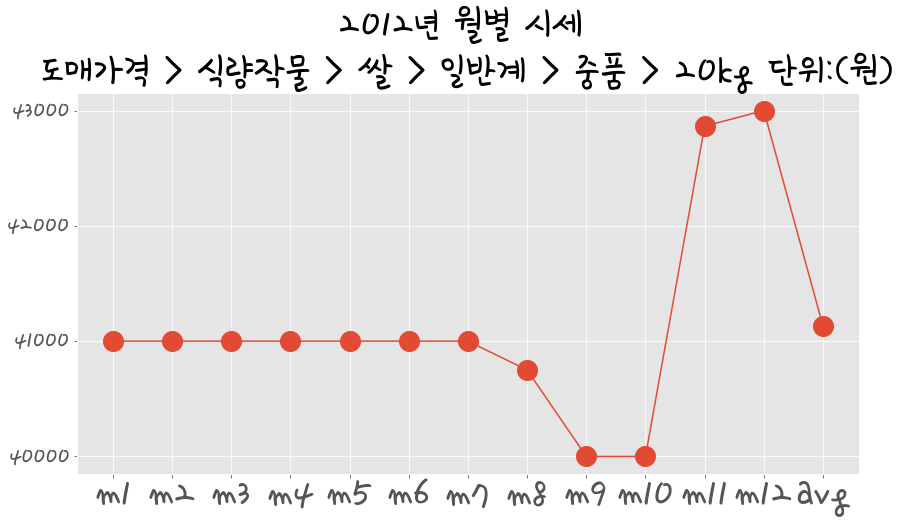

월별가격 입니다. [41000, 41000, 41000, 41000, 41000, 41000, 41000, 40750, 40000, 40000, 42864, 43000, 41131]


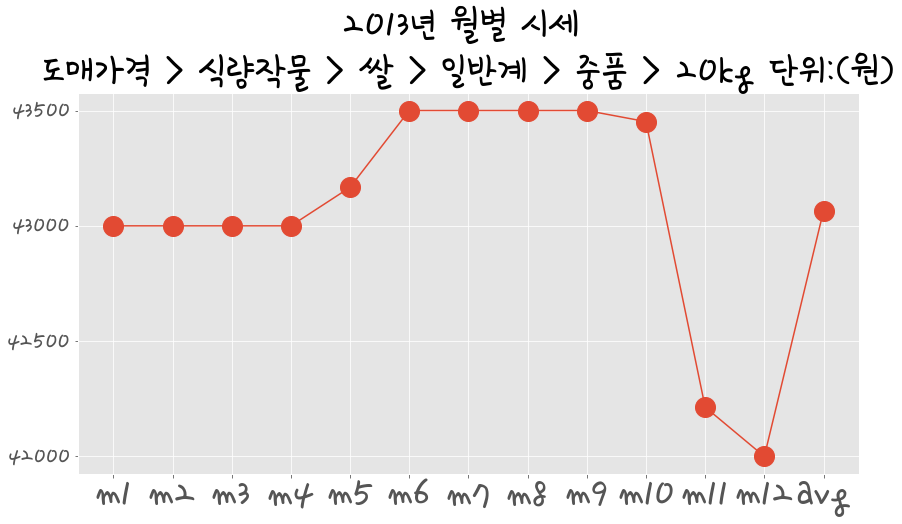

월별가격 입니다. [43000, 43000, 43000, 43000, 43167, 43500, 43500, 43500, 43500, 43452, 42214, 42000, 43065]


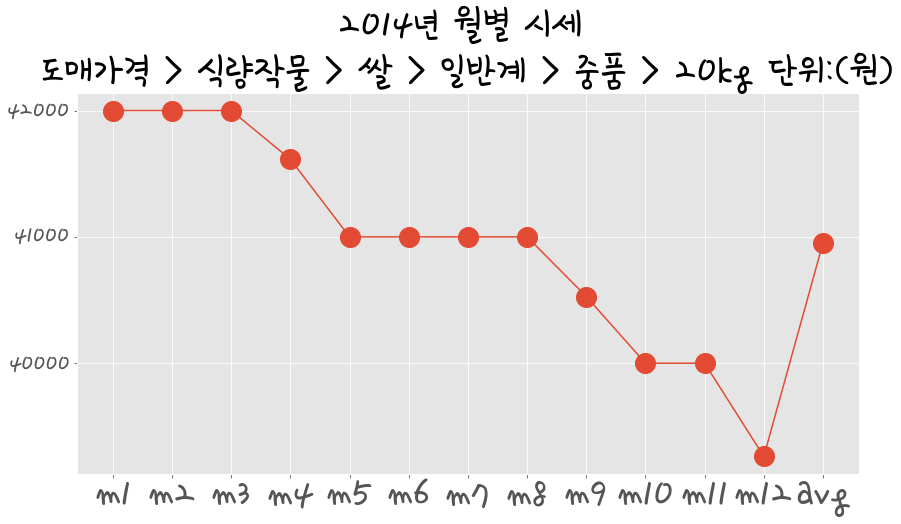

월별가격 입니다. [42000, 42000, 42000, 41614, 41000, 41000, 41000, 41000, 40528, 40000, 40000, 39262, 40953]


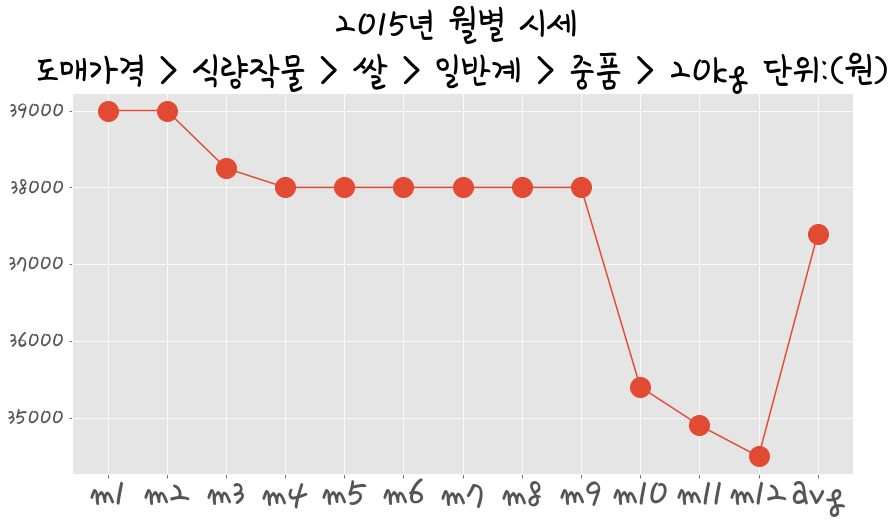

월별가격 입니다. [39000, 39000, 38250, 38000, 38000, 38000, 38000, 38000, 38000, 35405, 34905, 34500, 37397]


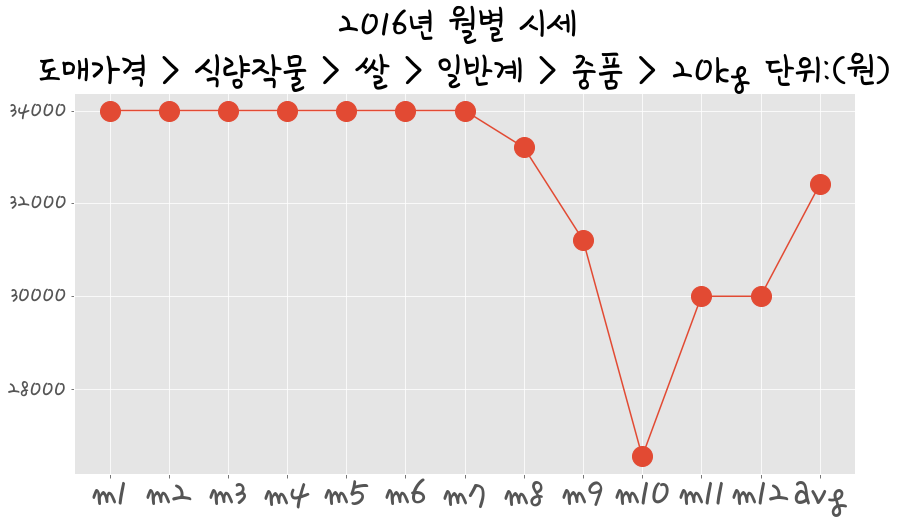

월별가격 입니다. [34000, 34000, 34000, 34000, 34000, 34000, 34000, 33205, 31211, 26550, 30000, 30000, 32409]


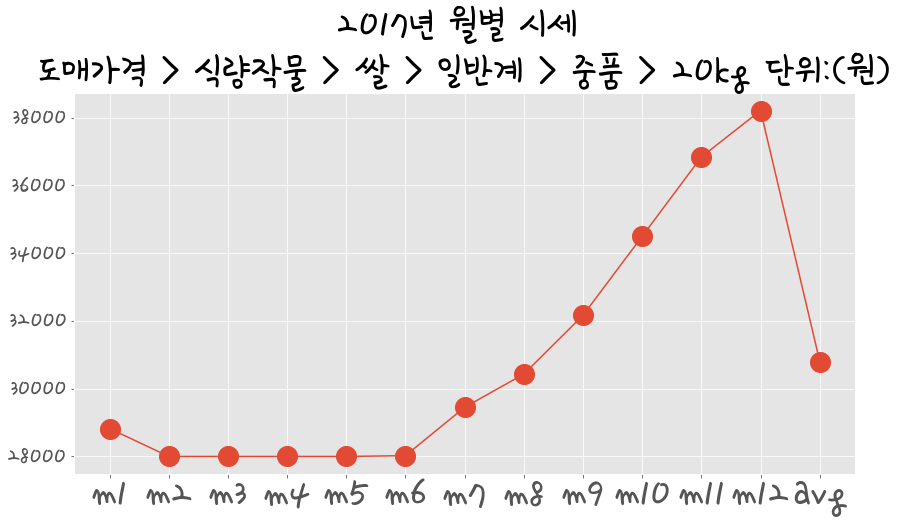

월별가격 입니다. [28825, 28000, 28000, 28000, 28000, 28024, 29452, 30432, 32167, 34500, 36841, 38211, 30802]


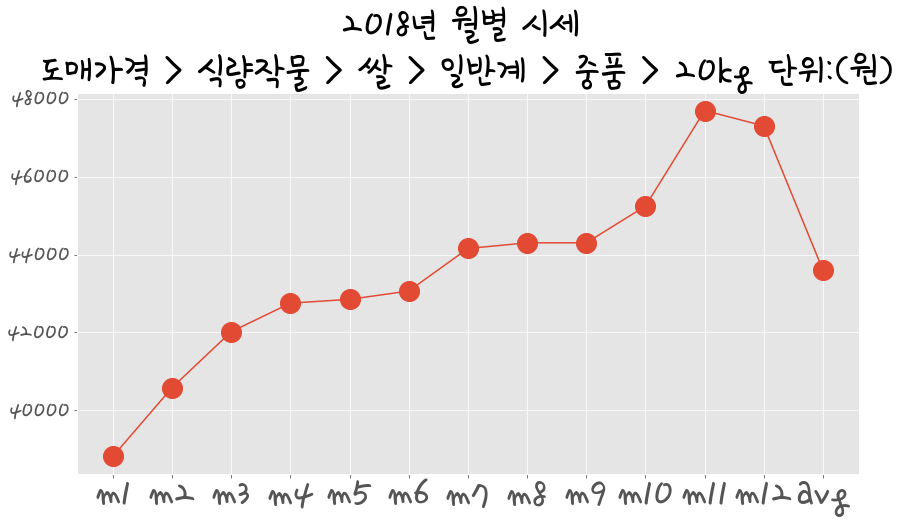

월별가격 입니다. [38818, 40583, 42019, 42752, 42850, 43063, 44155, 44300, 44300, 45243, 47695, 47300, 43595]


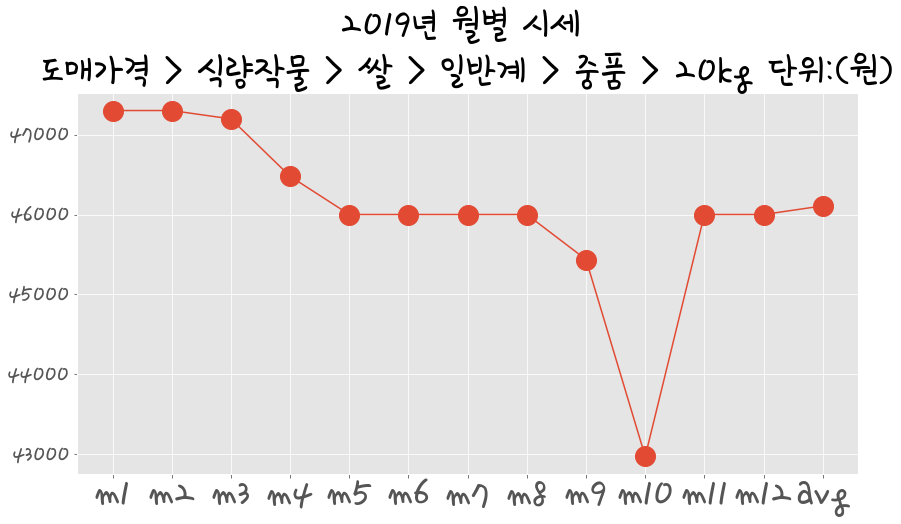

월별가격 입니다. [47300, 47300, 47195, 46477, 46000, 46000, 46000, 46000, 45437, 42975, 46000, 46000, 46108]


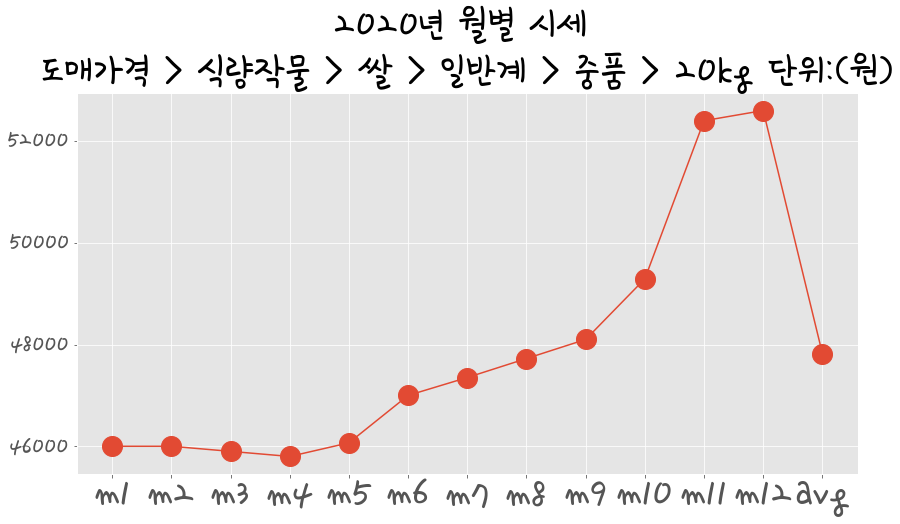

월별가격 입니다. [46000, 46000, 45900, 45800, 46068, 47000, 47352, 47725, 48100, 49292, 52400, 52600, 47823]


In [ ]:
while year < last_year + 1:
    x = df[f'{year}']
    plt.plot(x, marker='o', markersize=20)
    plt.title(f'{year}년 월별 시세 \n{name} 단위:(원)' , fontsize=50)
    plt.show()
    month_price = df[f'{year}'].to_list()
    print('월별가격 입니다.', month_price)
    year += 1
    time.sleep(1)